In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

CV_verbose_param = 1

In [2]:
# load dataset
dataset = pd.read_csv('dataset/spotify_tracks_cleaned.csv')
dataset

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,...,GENRE_spanish,GENRE_study,GENRE_swedish,GENRE_synth-pop,GENRE_tango,GENRE_techno,GENRE_trance,GENRE_trip-hop,GENRE_turkish,GENRE_world-music
0,Rill,Lolly,Lolly,160725,True,0.910,0.37400,8,-9.844,0,...,0,0,0,0,0,0,0,0,0,0
1,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,322933,False,0.269,0.51600,0,-7.361,1,...,0,0,0,0,0,0,0,0,0,0
2,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,515360,False,0.686,0.56000,5,-13.264,0,...,0,0,0,0,0,0,0,0,0,0
3,Jordan Sandhu,Teeje Week,Teeje Week,190203,False,0.679,0.77000,0,-3.537,1,...,0,0,0,0,0,0,0,0,0,0
4,Paul Kalkbrenner,Zeit,Tief,331240,False,0.519,0.43100,6,-13.606,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89660,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",325156,False,0.766,0.38200,7,-11.464,0,...,0,0,0,0,0,0,0,0,0,0
89661,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",109573,False,0.529,0.00879,10,-32.266,1,...,0,0,0,0,0,0,0,0,0,0
89662,Eric Chou,學著愛,以後別做朋友,260573,False,0.423,0.36000,3,-9.458,1,...,0,0,0,0,0,0,0,0,0,0
89663,Stereoclip,Echoes,Sunset Drive,234300,False,0.649,0.83400,10,-11.430,0,...,0,0,0,0,0,0,0,0,0,0


<span style="color:blue">**NUMERICAL**</span> features of the dataset :

- <span style="color:orange">***popularity***</span>: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- <span style="color:blue">***duration_ms***</span>: The track length in milliseconds

- <span style="color:blue">***danceability***</span>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- <span style="color:blue">***energy***</span>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
    
- <span style="color:blue">***loudness***</span>: The overall loudness of a track in decibels (dB)
    
- <span style="color:blue">***speechiness***</span>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
    
- <span style="color:blue">***acousticness***</span>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
    
- <span style="color:blue">***instrumentalness***</span>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
    
- <span style="color:blue">***liveness***</span>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
    
- <span style="color:blue">***valence***</span>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
    
- <span style="color:blue">***tempo***</span>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

In [3]:
# dropping columns corresponding to categorical features

columns_to_drop = list(dataset.columns)
for c in ['duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','popularity']:
    columns_to_drop.remove(c)
dataset.drop(columns=columns_to_drop, inplace=True)

In [4]:
X = dataset.drop(columns=['popularity'])    # features
y = dataset['popularity']                   # target variable

In [5]:
X.describe()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8.966500e+04,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000
mean,2.291574e+05,0.562212,0.634551,-8.498270,0.087457,0.328273,0.173487,0.216997,0.469533,122.060431
std,1.129767e+05,0.176682,0.256593,5.221948,0.113309,0.338339,0.323908,0.194916,0.262888,30.118150
min,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.730350e+05,0.450000,0.457000,-10.323000,0.036000,0.017100,0.000000,0.098200,0.249000,99.266000
50%,2.133080e+05,0.576000,0.677000,-7.183000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000
75%,2.642970e+05,0.692000,0.853000,-5.107000,0.085900,0.625000,0.097800,0.279000,0.683000,140.077000
max,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


popularity
100       1
99        1
96        2
97        2
98        2
       ... 
23     2038
20     2064
22     2256
21     2275
0      9352
Name: count, Length: 101, dtype: int64


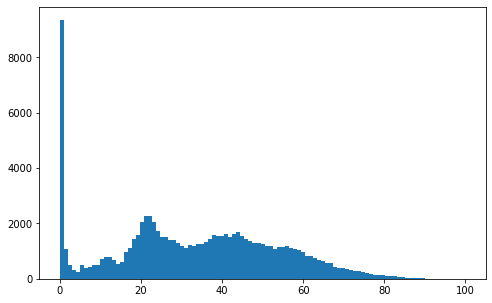

In [6]:
print(y.value_counts().sort_values())

fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(5)
ax.hist(y, bins=101)
plt.show()

In [7]:
X['popularity_subsamples'] = y.map(lambda x: x if x % 2 == 0 else x+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['popularity_subsamples'])

X_train.drop(columns='popularity_subsamples', inplace=True)
X_test.drop(columns='popularity_subsamples', inplace=True)

### Features selection

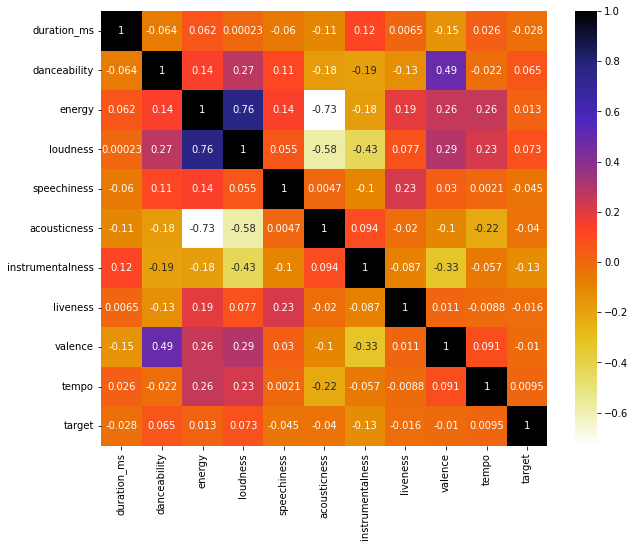

In [8]:
all_data = X_train.copy()
all_data['target'] = y_train
plt.figure(figsize=(10,8))
sns.heatmap(all_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

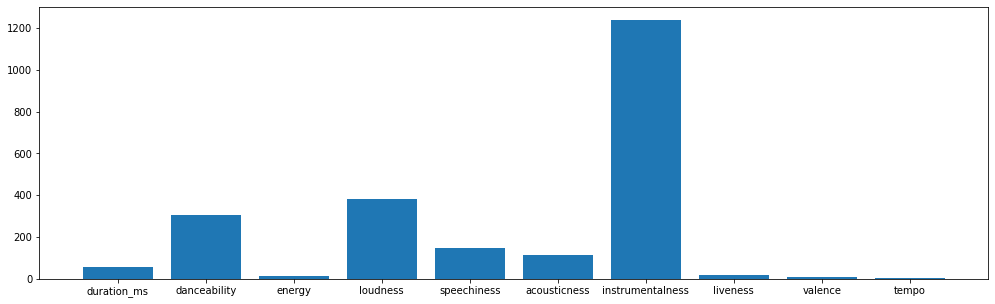

In [9]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)

plt.figure(figsize=(17,5))
plt.bar([X_train.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [10]:
worst_features = ['energy', 'liveness', 'valence', 'tempo']
X_train.drop(columns=worst_features, inplace=True)
X_test.drop(columns=worst_features, inplace=True)

### Features normalization

In [11]:
standard_scaler = preprocessing.StandardScaler().set_output(transform="pandas")

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

## *Ridge Regression* on *Spotify Tracks Dataset* 

In [12]:
from ridge_regression import RR

### Hyperparameters tuning

In [13]:
λ_grid = np.linspace(0, 120, num=20)

learner = GridSearchCV(estimator=RR(), n_jobs=-1, param_grid={'λ': λ_grid}, scoring='neg_mean_squared_error', cv=5, verbose=CV_verbose_param)
learner.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RR(), n_jobs=-1,
             param_grid={'λ': array([  0.        ,   6.31578947,  12.63157895,  18.94736842,
        25.26315789,  31.57894737,  37.89473684,  44.21052632,
        50.52631579,  56.84210526,  63.15789474,  69.47368421,
        75.78947368,  82.10526316,  88.42105263,  94.73684211,
       101.05263158, 107.36842105, 113.68421053, 120.        ])},
             scoring='neg_mean_squared_error', verbose=1)

In [14]:
print(f'Best hyperparams : λ = {learner.best_params_["λ"]}')

Best hyperparams : λ = 63.15789473684211


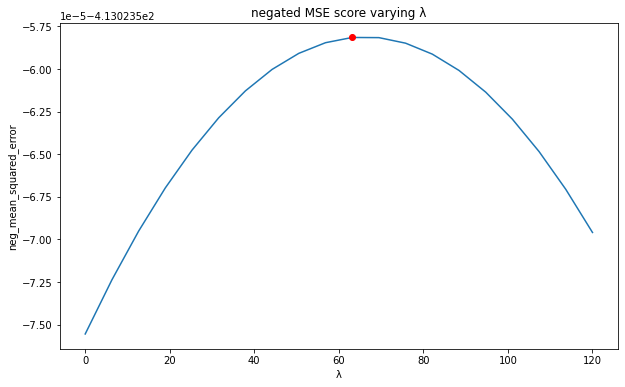

In [15]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)
ax.plot(learner.cv_results_['param_λ'].data, learner.cv_results_['mean_test_score'])
ax.plot(learner.best_params_['λ'], learner.best_score_, 'ro') 
ax.set(xlabel='λ', ylabel='neg_mean_squared_error', title='negated MSE score varying λ')
plt.show()

In [16]:
rr = learner.best_estimator_
rr.fit(X_train, y_train)
y_prediction = rr.predict(X_test)

print('   MSE :', mean_squared_error(y_test, y_prediction))
print('   MAE :', mean_absolute_error(y_test, y_prediction))
print('    R2 :', r2_score(y_test, y_prediction))

   MSE : 414.14901640285245
   MAE : 16.851320134208876
    R2 : 0.0200125876389442


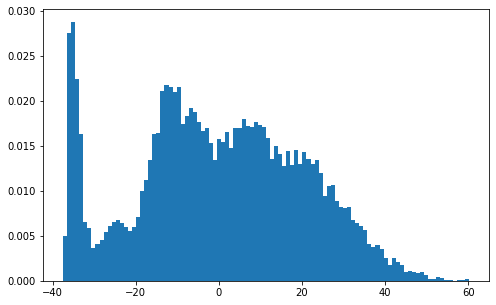

In [17]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(5)
ax.hist(y_test - y_prediction, density=True, bins=100)
plt.show()

Checking that my implementation performs exactly as the one in *sklearn*

In [18]:
from sklearn.linear_model import Ridge

debug = True

if debug:

    rr = Ridge(alpha=learner.best_params_['λ'])
    rr.fit(X_train, y_train)
    y_prediction = rr.predict(X_test)

    print('   MSE :', mean_squared_error(y_test, y_prediction))
    print('   MAE :', mean_absolute_error(y_test, y_prediction))
    print('    R2 :', r2_score(y_test, y_prediction))

   MSE : 414.14901640285245
   MAE : 16.851320134208873
    R2 : 0.0200125876389442


## *Kernel Ridge Regression* on *Spotify Tracks Dataset*

In [19]:
from kernel_ridge_regression import KRR

We run KRR just on samples of the dataset because, otherwise, it would get too computationally expensive 

In [20]:
train_sample_size = 5000
test_sample_size = 1000

X_train_sample = X_train.sample(n=train_sample_size, random_state=1)
y_train_sample = pd.Series(data = [y_train[i] for i in X_train_sample.index], index = X_train_sample.index)

X_test_sample = X_test.sample(n=test_sample_size, random_state=1)
y_test_sample = pd.Series(data = [y_test[i] for i in X_test_sample.index], index = X_test_sample.index)

### Hyperparameters tuning

In [21]:
λ_grid = 10. ** np.arange(-2, 3) 
γ_grid = 10. ** np.arange(-1, 4) 

learner = GridSearchCV(estimator=KRR(), n_jobs=-1, param_grid={'λ': λ_grid, 'γ': γ_grid}, scoring='neg_mean_squared_error', cv=5, verbose=CV_verbose_param)
learner.fit(X_train_sample, y_train_sample)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=KRR(), n_jobs=-1,
             param_grid={'γ': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'λ': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_mean_squared_error', verbose=1)

In [22]:
print(f'Best hyperparams : λ = {learner.best_params_["λ"]} , γ = {learner.best_params_["γ"]}')

Best hyperparams : λ = 1.0 , γ = 10.0


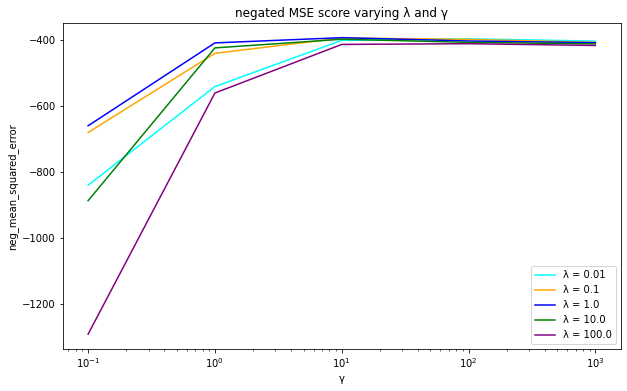

In [23]:
# preparing the data to plot

score = learner.cv_results_['mean_test_score']

dict_λ = {}
for v in set(learner.cv_results_['param_λ'].data):
    dict_λ[v] = (sorted(set(learner.cv_results_['param_γ'].data)), [])
for i, p in enumerate(learner.cv_results_['params']):
    dict_λ[p['λ']][1].append(score[i])
#del(dict_λ[0.0])

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

colors = ['purple', 'green', 'blue', 'orange', 'cyan']
for k in sorted(dict_λ.keys()):
    ax.plot(dict_λ[k][0], dict_λ[k][1], label = f"λ = {k}", linestyle="-", color = colors.pop())

ax.set(xscale='log', xlabel='γ', ylabel='neg_mean_squared_error', title='negated MSE score varying λ and γ')
plt.legend()
plt.show()

In [24]:
train_sample_size_BIG = 20000
test_sample_size_BIG = 4000

X_train_sample_BIG = X_train.sample(n=train_sample_size_BIG, random_state=1)
y_train_sample_BIG = pd.Series(data = [y_train[i] for i in X_train_sample_BIG.index], index = X_train_sample_BIG.index)

X_test_sample_BIG = X_test.sample(n=test_sample_size_BIG, random_state=1)
y_test_sample_BIG = pd.Series(data = [y_test[i] for i in X_test_sample_BIG.index], index = X_test_sample_BIG.index)

In [25]:
krr = learner.best_estimator_
krr.fit(X_train_sample_BIG, y_train_sample_BIG)
y_prediction = krr.predict(X_test_sample_BIG)

print('   MSE :', mean_squared_error(y_test_sample_BIG, y_prediction))
print('   MAE :', mean_absolute_error(y_test_sample_BIG, y_prediction))
print('    R2 :', r2_score(y_test_sample_BIG, y_prediction))

   MSE : 377.8658357061992
   MAE : 15.863612520634558
    R2 : 0.06353998914848746


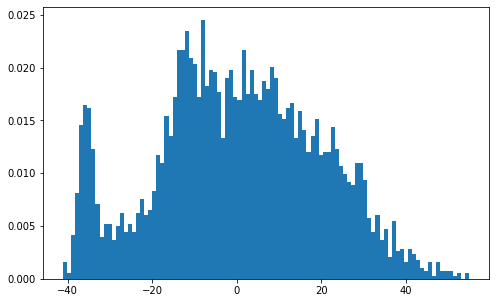

In [26]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(5)
ax.hist(y_test_sample_BIG - y_prediction, density=True, bins=100)
plt.show()

Checking that my implementation performs exactly as the one in *sklearn*

In [27]:
from sklearn.kernel_ridge import KernelRidge

debug = True

if debug:

    krr = KernelRidge(alpha=learner.best_params_["λ"], kernel="rbf", gamma=1/(learner.best_params_["γ"] * 2))
    krr.fit(X_train_sample_BIG, y_train_sample_BIG)
    y_prediction = krr.predict(X_test_sample_BIG)

    print('   MSE :', mean_squared_error(y_test_sample_BIG, y_prediction))
    print('   MAE :', mean_absolute_error(y_test_sample_BIG, y_prediction))
    print('    R2 :', r2_score(y_test_sample_BIG, y_prediction))

   MSE : 377.86583570619894
   MAE : 15.86361252063455
    R2 : 0.06353998914848813
